In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
f

### Statistical Regression

```

A n*m

[
 x1_1, x1_2, x1_3 . . . . x1_m
 x2_1, x2_2, x2_3 . . . . x2_m
 .
 .
 .
 xn_1, xn_2, xn_3 . . . . xn_m

]

Y = 

[
 y1
 y2
 y3
 .
 .
 .
 yn
]

```

**Goal**: Find `C = {C1, C2, C3, . . Cm` S.T. `C dot_prod x_i = y_i`

> Strong correlation is set to 0.5+- for now


In [2]:
FILE_X = '../data/lec_5/Example1_features.csv'
FILE_Y = '../data/lec_5/Example1_target.csv'
X_orig = pd.read_csv(FILE_X)
y_orig = pd.read_csv(FILE_Y)

In [3]:
y = y_orig.y
X = X_orig

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5413)

reg = LinearRegression().fit(X_train, y_train)
m = reg.coef_
b = reg.intercept_

r_test = reg.score(X_test, y_test)
r_train = reg.score(X_train, y_train)

y_predicted = reg.predict(X)

In [5]:
print(f'slope: {m}')

print(f'intercept: {b}')

# print('correlation')
# print(r)

print(f'corr train: {r_train}')
print(f'corr test: {r_test}')

slope: [-1.06406625  1.95908061]
intercept: 7.834658715198598
corr train: 0.9546396237743775
corr test: 0.9436063811971677


In [6]:
# This is how we split training data
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1234)

## Logistic Regression

```
y = e^ θ1x1 + θ2x2 + θ3x3 + . . . + θnxn + θn+1

Linearize:

lny_hat = θ1x1 + θ2x2 + θ3x3 + . . . + θnxn + θn+1 // Linear regression problem

```

For classification, we will use


```

y_hat =  1 / (1 + e ^ -θX)

```

*Range*: [0, 1]

##### Sample problem

```
A = [
 x1
 .
 .
 .
 xn
]

y = [
 y1
 .
 .
 .
 yn
]

where y_i is {0, 1}

```

If we perform linear regression on y_hat, then

```

y_hat = [
 y_hat1
 .
 .
 .
 y_hat_n
]   => [0 ,1]         

```

**Impose a decision rule**

If `y_hat >= 0.5` => 1

else, =>0

**Remark**

```
y = e^x => lny = x

y = 1 / (1 + e^-x) => ln( y / 1-y) = x  <--- logit function
```

In [7]:
can = datasets.load_breast_cancer()

X = can.data
y = can.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
clf = LogisticRegression(random_state=1234).fit(X_train, y_train)

/Users/ninz/.local/share/virtualenvs/cs297-fZk1rqQo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
y_pre = clf.predict(X_test)

_y = list(y_test)
match = 0

_y2 = list(y_pre)

for i, v in enumerate(_y):
    if _y2[i] == v:
        match += 1

match / len(_y)

print(np.mean(y_pre == y_test))

print(clf.score(X_test, y_test))

0.9239766081871345
0.9239766081871345


**Confusion Matrix** (determine where are you correct or where are you not correct)

```
            Predicted
            
            0    1
Actual  0  12    5  17
        1   0   10  10
```

- overall accuracy: `22 / 27 = 81%`
- class 0 accuracy: `12 / 17 = 71%`
- class 1 accuracy: `10 / 10 = 100%`

> The model is able to consider actual class 1 than class 0


In [11]:
conf = confusion_matrix(y_test, y_pre)

conf

array([[ 57,   9],
       [  4, 101]])

In [12]:
# Exercise

_y = y_orig.Labels
X_train, X_test, y_train, y_test = train_test_split(X_orig, _y, test_size=0.25, random_state=1234)

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1234).fit(X_train, y_train)

In [13]:
y_pre = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9


In [14]:
conf = confusion_matrix(y_test, y_pre)
conf

array([[9, 0, 0],
       [0, 2, 1],
       [1, 0, 7]])

## K-NN

- Check the K nearest neighbors of x_new
- The label with the most count is the label of x_new

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from matplotlib import cm

In [16]:
FILE_X = '../data/lec_5/kNN_features.csv'
FILE_Y = '../data/lec_5/kNN_target.csv'
X = pd.read_csv(FILE_X)
y_ = pd.read_csv(FILE_Y)

y = y_.Labels

In [17]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

In [18]:
x_new = np.array([[1, -3], [2, 1]])

In [42]:
knn.kneighbors(x_new)
z = knn.predict(x_new)

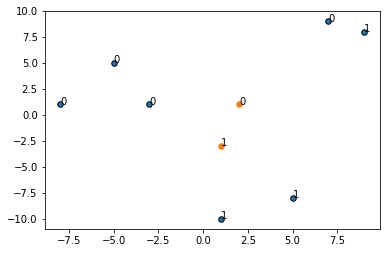

In [69]:
# DO THIS
fig, ax = plt.subplots()
ax.scatter(X['X1'], X['X2'], marker='o', s=30, edgecolor='k')

ax.scatter(x_new[:,0], x_new[:,1], marker='o', s=30)

for i, _x in enumerate(x_new):
    ax.annotate('{}'.format(z[i]), (_x[0], _x[1]))
for i, _x in X.iterrows():
    ax.annotate('{}'.format(y[i]), (_x.X1, _x.X2))

plt.show()